<a href="https://colab.research.google.com/github/natasa409/natasa409/blob/main/Na_oblaku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

./AllData25sym2019.txt


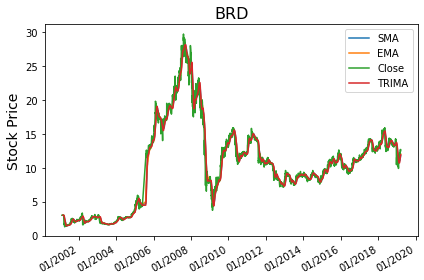

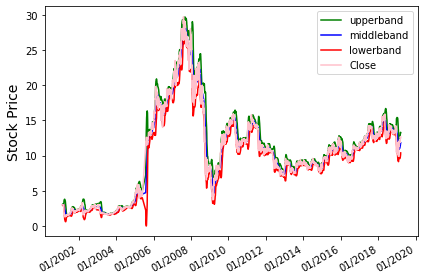

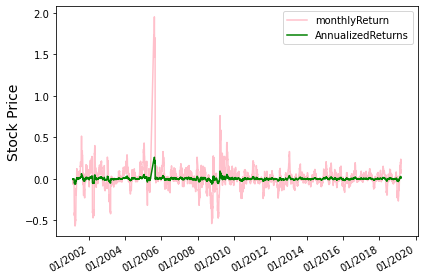

Buy & hold scenario for ALR
gainBuyHoldValidation = -1.929
gainPercentBuyHoldValidation = -63.246
valueInvestedValidation = 3.050
lastClosePriceValidation = 1.121

gainBuyHoldTest = 1.300
gainPercentBuyHoldTest = 116.071
valueInvestedTest = 1.120
lastClosePriceTest = 2.420
Buy & hold scenario for ALT
gainBuyHoldValidation = 0.006
gainPercentBuyHoldValidation = 16.471
valueInvestedValidation = 0.034
lastClosePriceValidation = 0.040

gainBuyHoldTest = -0.004
gainPercentBuyHoldTest = -11.538
valueInvestedTest = 0.039
lastClosePriceTest = 0.035
Buy & hold scenario for ATB
gainBuyHoldValidation = 0.048
gainPercentBuyHoldValidation = 9.057
valueInvestedValidation = 0.530
lastClosePriceValidation = 0.578

gainBuyHoldTest = -0.081
gainPercentBuyHoldTest = -14.038
valueInvestedTest = 0.577
lastClosePriceTest = 0.496
Buy & hold scenario for BIO
gainBuyHoldValidation = -0.035
gainPercentBuyHoldValidation = -11.986
valueInvestedValidation = 0.292
lastClosePriceValidation = 0.257

gainBuyHoldTest =

KeyboardInterrupt: 

In [ ]:
#!/usr/bin/env python
# coding: utf-8

# # Read the data

# In[2]:


get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
import os
#probably necessary to install ta-lib: https://blog.quantinsti.com/install-ta-lib-python/
import talib as ta 
import datetime as dt
import matplotlib.dates as mdates


##sprememba poti
folderPath = './'
fileName = folderPath + 'AllData25sym2019.txt'
symbol = 'BRD'


allData = pd.read_csv(fileName, delimiter = '\t')


subset = allData.loc[allData['Symbol'] == symbol].copy()

subset['lr'] = np.log(subset['ClosePrice']).diff()
subset['RSI'] = ta.RSI(subset["ClosePrice"].values)
subset['SMA'] = ta.SMA(subset["ClosePrice"].values, timeperiod = 30)
subset['EMA'] = ta.EMA(subset["ClosePrice"].values, timeperiod = 30)
subset['TRIMA'] = ta.TRIMA(subset["ClosePrice"].values, timeperiod = 30)
#monthly_return = prices.pct_change(21)
subset['monthlyReturn'] = subset['ClosePrice'].pct_change(21)
subset['AnnualizedReturns'] = ((1 + subset['monthlyReturn'] / 100.0)**12) - 1#(1+0.02)^12 – 1
subset['LN'] = ta.LN(subset["ClosePrice"].values)

subset['upperband'], subset['middleband'], subset['lowerband'] = ta.BBANDS(subset["ClosePrice"].values, timeperiod = 30, nbdevup=2, nbdevdn=2, matype=0)
subsetDates = subset[['Date']].values[15:]
subsetDates = [onlyDate for [onlyDate] in subsetDates]

startPlot = 15
stopPlot = 7000

fig = plt.figure()
x = [dt.datetime.strptime(d,'%m/%d/%Y').date() for d in subsetDates]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.plot(x, subset['SMA'][startPlot:stopPlot], label='SMA')
plt.plot(x, subset['EMA'][startPlot:stopPlot], label='EMA')
plt.plot(x, subset['ClosePrice'][15:], label='Close')
plt.plot(x, subset['TRIMA'][startPlot:stopPlot], label='TRIMA')
plt.gcf().autofmt_xdate()
plt.title(symbol, fontsize = 16)
#plt.xlabel('Days', fontsize = 14)
plt.ylabel('Stock Price', fontsize = 14)
plt.legend()
plt.tight_layout()
plt.show()



fig = plt.figure()
x = [dt.datetime.strptime(d,'%m/%d/%Y').date() for d in subsetDates]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.plot(x, subset['upperband'][15:], color='green', label='upperband')
plt.plot(x, subset['middleband'][15:], color='blue', label='middleband')
plt.plot(x, subset['lowerband'][15:], color='red', label='lowerband')
plt.plot(x, subset['ClosePrice'][15:], color='pink', label='Close')
plt.gcf().autofmt_xdate()
#plt.title('Test Stock Price Prediction', fontsize = 16)
#plt.xlabel('Days', fontsize = 14)
plt.ylabel('Stock Price', fontsize = 14)
plt.legend()
plt.tight_layout()
plt.show()

fig = plt.figure()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))

#plt.plot(subset['middleband'][startPlot:stopPlot], color='blue', label='middleband')
#plt.plot(subset['lowerband'][startPlot:stopPlot], color='red', label='lowerband')
plt.plot(x, subset['monthlyReturn'][15:], color='pink', label='monthlyReturn')
plt.plot(x, subset['AnnualizedReturns'][15:], color='green', label='AnnualizedReturns')
plt.gcf().autofmt_xdate()
#plt.title('Test Stock Price Prediction', fontsize = 16)
#plt.xlabel('Days', fontsize = 14)
plt.ylabel('Stock Price', fontsize = 14)
plt.legend()
plt.tight_layout()
plt.show()

#--------------

def simulateBuyHoldScenario(applyOnValidationData = True):
    if applyOnValidationData:
        valid_data = subset[(noTrain + 1):(noTrain + noValid)]    
        validOrTest = 'Validation'
    else:
        valid_data = subset[(noTrain + noValid + 1):]
    valid_processed = valid_data[['ClosePrice']].values
    [valueInvested] = valid_data[['ClosePrice']].iloc[0].values
    [lastClosePrice] = valid_data[['ClosePrice']].iloc[len(valid_processed) - 1].values
    return lastClosePrice - valueInvested, ((lastClosePrice - valueInvested) * 100) / valueInvested, valueInvested, lastClosePrice

allSymbols = allData.Symbol.unique()

for symbol in allSymbols:
    print('=======')
    print('Buy & hold scenario for {}'.format(symbol))
    subset = allData.loc[allData['Symbol'] == symbol].copy()
    subset['lr'] = np.log(subset['ClosePrice']).diff()
    subset['RSI'] = ta.RSI(subset["ClosePrice"].values)
    subset['SMA'] = ta.SMA(subset["ClosePrice"].values, timeperiod = 30)
    subset['EMA'] = ta.EMA(subset["ClosePrice"].values, timeperiod = 30)
    subset['TRIMA'] = ta.TRIMA(subset["ClosePrice"].values, timeperiod = 30)

    subset['LN'] = ta.LN(subset["ClosePrice"].values)

    
     ##dodala
    percentTrain = 60
    percentValid = 20
    
    subset['upperband'], subset['middleband'], subset['lowerband'] = ta.BBANDS(subset["ClosePrice"].values, timeperiod = 30, nbdevup=2, nbdevdn=2, matype=0)
    nRows = subset.shape[0]
    noTrain = int((percentTrain / 100) * nRows)
    noValid = int((percentValid / 100) * nRows)
    training_data = subset[:noTrain]
    valid_data = subset[(noTrain + 1):(noTrain + noValid)]
    test_data = subset[(noTrain + noValid + 1):]
    
    applyOnValidationData = True
    
    gainBuyHoldValidation, gainPercentBuyHoldValidation, valueInvestedValidation, lastClosePriceValidation = simulateBuyHoldScenario(applyOnValidationData)
    
    print('gainBuyHoldValidation = {:.3f}\ngainPercentBuyHoldValidation = {:.3f}\nvalueInvestedValidation = {:.3f}\nlastClosePriceValidation = {:.3f}'.format(gainBuyHoldValidation, gainPercentBuyHoldValidation, valueInvestedValidation, lastClosePriceValidation))
    
    applyOnValidationData = False
    
    gainBuyHoldTest, gainPercentBuyHoldTest, valueInvestedTest, lastClosePriceTest = simulateBuyHoldScenario(applyOnValidationData)
    
    print('\ngainBuyHoldTest = {:.3f}\ngainPercentBuyHoldTest = {:.3f}\nvalueInvestedTest = {:.3f}\nlastClosePriceTest = {:.3f}'.format(gainBuyHoldTest, gainPercentBuyHoldTest, valueInvestedTest, lastClosePriceTest))
    
    #--------------
    
    
def simulateBuyHoldScenario(applyOnValidationData = True):
    if applyOnValidationData:
        valid_data = subset[(noTrain + 1):(noTrain + noValid)]    
        validOrTest = 'Validation'
    else:
        valid_data = subset[(noTrain + noValid + 1):]
    valid_processed = valid_data[['ClosePrice']].values
    [valueInvested] = valid_data[['ClosePrice']].iloc[0].values
    [lastClosePrice] = valid_data[['ClosePrice']].iloc[len(valid_processed) - 1].values
    return lastClosePrice - valueInvested, ((lastClosePrice - valueInvested) * 100) / valueInvested, valueInvested, lastClosePrice

allSymbols = allData.Symbol.unique()

for symbol in allSymbols:
    print('=======')
    print('Buy & hold scenario for {}'.format(symbol))
    subset = allData.loc[allData['Symbol'] == symbol].copy()
    subset['lr'] = np.log(subset['ClosePrice']).diff()
    subset['RSI'] = ta.RSI(subset["ClosePrice"].values)
    subset['SMA'] = ta.SMA(subset["ClosePrice"].values, timeperiod = 30)
    subset['EMA'] = ta.EMA(subset["ClosePrice"].values, timeperiod = 30)
    subset['TRIMA'] = ta.TRIMA(subset["ClosePrice"].values, timeperiod = 30)

    subset['LN'] = ta.LN(subset["ClosePrice"].values)

    subset['upperband'], subset['middleband'], subset['lowerband'] = ta.BBANDS(subset["ClosePrice"].values, timeperiod = 30, nbdevup=2, nbdevdn=2, matype=0)
    nRows = subset.shape[0]
    noTrain = int((percentTrain / 100) * nRows)
    noValid = int((percentValid / 100) * nRows)
    training_data = subset[:noTrain]
    valid_data = subset[(noTrain + 1):(noTrain + noValid)]
    test_data = subset[(noTrain + noValid + 1):]
    
    applyOnValidationData = True
    
    gainBuyHoldValidation, gainPercentBuyHoldValidation, valueInvestedValidation, lastClosePriceValidation = simulateBuyHoldScenario(applyOnValidationData)
    
    print('gainBuyHoldValidation = {:.3f}\ngainPercentBuyHoldValidation = {:.3f}\nvalueInvestedValidation = {:.3f}\nlastClosePriceValidation = {:.3f}'.format(gainBuyHoldValidation, gainPercentBuyHoldValidation, valueInvestedValidation, lastClosePriceValidation))
    
    applyOnValidationData = False
    
    gainBuyHoldTest, gainPercentBuyHoldTest, valueInvestedTest, lastClosePriceTest = simulateBuyHoldScenario(applyOnValidationData)
    
    print('\ngainBuyHoldTest = {:.3f}\ngainPercentBuyHoldTest = {:.3f}\nvalueInvestedTest = {:.3f}\nlastClosePriceTest = {:.3f}'.format(gainBuyHoldTest, gainPercentBuyHoldTest, valueInvestedTest, lastClosePriceTest))
    
     #--------------
        
def simulateBollingerScenario(applyOnValidationData = True, showPlot = False, savePlot = False):

    haveStock = True
    haveMoney = 0
    
    overallStockMoney = [(haveStock, haveMoney)]
    if applyOnValidationData:
        valid_data = subset[(noTrain + 1):(noTrain + noValid)]    
        validOrTest = 'Validation'
    else:
        valid_data = subset[(noTrain + noValid + 1):]
    valid_processed = valid_data[['ClosePrice']].values
    testDates = valid_data[['Date']].values
    testDates = [onlyDate for [onlyDate] in testDates]
    
    #print(valid_data.iloc[0])

    timesSold = 0
    xSell = []
    ySell = []
    xBuy = []
    yBuy = []
    #x = []
    for step in range(len(valid_processed)):
        [lowV] = valid_data[['lowerband']].iloc[step].values
        [upV] = valid_data[['upperband']].iloc[step].values
        [cP] = valid_data[['ClosePrice']].iloc[step].values
        if haveStock:
            if cP > upV:
                timesSold += 1
                xSell.append(testDates[step])
                ySell.append(cP)
                haveStock = False
                haveMoney += cP
        if haveStock == False:
            if cP < lowV:
                haveStock = True
                haveMoney -= cP
                xBuy.append(testDates[step])
                yBuy.append(cP)
        overallStockMoney.append((haveStock, haveMoney))
        #x.append(step)

    print('timesSold =', timesSold)

    (haveStock, haveMoney) = overallStockMoney[-1]
    [valueInvested] = valid_data[['ClosePrice']].iloc[0].values
    [lastClosePrice] = valid_data[['ClosePrice']].iloc[len(valid_processed) - 1].values
    print(haveStock, haveMoney)
    gain = haveMoney
    if haveStock:
        gain += lastClosePrice
    print('Value to add', valid_data[['ClosePrice']].iloc[len(valid_processed) - 1].values)
    print('gain = ', gain)
    
    if showPlot:
        x = [dt.datetime.strptime(d,'%m/%d/%Y').date() for d in testDates]
        fig = plt.figure(figsize=(10,6))
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
        plt.plot(x, valid_data['upperband'], color='green', label='upperband')
        plt.plot(x, valid_data['upperband'], color='green', label='upperband')
        plt.plot(x, valid_data['middleband'], color='blue', label='middleband')
        plt.plot(x, valid_data['lowerband'], color='red', label='lowerband')
        plt.plot(x, valid_data['ClosePrice'], label='Close')
        plt.gcf().autofmt_xdate()
        size = [100] * len(xSell)
        
        xSell = [dt.datetime.strptime(d,'%m/%d/%Y').date() for d in xSell]
        xBuy = [dt.datetime.strptime(d,'%m/%d/%Y').date() for d in xBuy]
        plt.scatter(xSell, ySell, marker='X', s = 100, color="red", label='sell')
        plt.scatter(xBuy, yBuy, marker='P', s = 100, color="green", label='buy')
        #plt.gcf().autofmt_xdate()
        plt.title('Value invested = ' + str(valueInvested) + '\nfinal = ' + str(lastClosePrice) + '\ngain = ' + str(gain - valueInvested) + '\ngain % = ' + str(((gain - valueInvested) * 100) / valueInvested), fontsize = 16)
        #plt.xlabel('Days', fontsize = 14)
        plt.ylabel('Stock Price', fontsize = 14)
        plt.legend()
        plt.tight_layout()
        plt.show()

        if savePlot:
            folderSave = resPath + 'Plots/Scenarios/'
            if not os.path.exists(folderSave):
                os.makedirs(folderSave)
            fig.savefig(folderSave + str(symbol) + validOrTest + 'Bollinger.pdf')
    
    return gain - valueInvested, ((gain - valueInvested) * 100) / valueInvested, timesSold

for symbol in allSymbols:
    print('=======')
    print('Buy & hold scenario for {}'.format(symbol))
    subset = allData.loc[allData['Symbol'] == symbol].copy()
    subset['lr'] = np.log(subset['ClosePrice']).diff()
    subset['RSI'] = ta.RSI(subset["ClosePrice"].values)
    subset['SMA'] = ta.SMA(subset["ClosePrice"].values, timeperiod = 30)
    subset['EMA'] = ta.EMA(subset["ClosePrice"].values, timeperiod = 30)
    subset['TRIMA'] = ta.TRIMA(subset["ClosePrice"].values, timeperiod = 30)

    subset['LN'] = ta.LN(subset["ClosePrice"].values)

    subset['upperband'], subset['middleband'], subset['lowerband'] = ta.BBANDS(subset["ClosePrice"].values, timeperiod = 30, nbdevup=2, nbdevdn=2, matype=0)
    nRows = subset.shape[0]
    noTrain = int((percentTrain / 100) * nRows)
    noValid = int((percentValid / 100) * nRows)
    training_data = subset[:noTrain]
    valid_data = subset[(noTrain + 1):(noTrain + noValid)]
    test_data = subset[(noTrain + noValid + 1):]
    
    applyOnValidationData = True
    showPlot = False
    savePlot = False

    #mseCNN, predictions = getMSE(applyOnValidationData, showPlot, savePlot)

    gainBollValidation, gainPercentBollValidation, timesSoldValidBoll = simulateBollingerScenario(applyOnValidationData, showPlot, savePlot)
    
    applyOnValidationData = False
    showPlot = True
    
    gainBollTest, gainPercentBollTest, timesSoldTestBoll = simulateBollingerScenario(applyOnValidationData, showPlot, savePlot)
    
    #--------------

from sklearn.preprocessing import MinMaxScaler  
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM 
from keras.layers import Dropout
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import talib as ta 
import os

import datetime as dt
import matplotlib.dates as mdates

from sklearn.metrics import mean_squared_error


def trainLSTM(symbol, noDaysBack, percentTrain, onlyLoadModel, resPath):
    subset = allData.loc[allData['Symbol'] == symbol]
    #Number of rows
    nRows = subset.shape[0]
    noTrain = int((percentTrain / 100) * nRows)
    training_data = subset[:noTrain]
    training_processed = training_data[['ClosePrice']].values
    scaler = MinMaxScaler(feature_range = (0, 1))
    training_scaled = scaler.fit_transform(training_processed)
    features_set = []
    labels = []
    for i in range(noDaysBack, len(training_processed)):  
        features_set.append(training_scaled[i - noDaysBack:i, 0])
        labels.append(training_scaled[i, 0])
    features_set, labels = np.array(features_set), np.array(labels)
    features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))
    
    model = Sequential()

    model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))
    model.add(Dropout(0.2))

    model.add(LSTM(units=50, return_sequences=True))  
    model.add(Dropout(0.2))

    model.add(LSTM(units=50))  
    model.add(Dropout(0.2)) 

    model.add(Dense(units = 1))  

    model.compile(optimizer = 'adam', loss = 'mean_squared_error') 
    
    fileModelName = resPath + "Models/LSTM/" + symbol + "LSTMDaysBack" + str(noDaysBack) + ".h5"
        
    if onlyLoadModel == False or not os.path.isfile(fileModelName) :
        model.fit(features_set, labels, epochs = 20, batch_size = 32)
        if not os.path.exists(resPath + "Models/LSTM/"):
            os.makedirs(resPath + "Models/LSTM/")
        model.save_weights(fileModelName)
    else:
        model.load_weights(fileModelName)
        print('No training is done, the model is loaded from', fileModelName)
        print('If training is desired, set onlyLoadModel variable to False.')
    test_data = subset[(noTrain + 1):]
    test_processed = test_data[['ClosePrice']].values
    testDates = test_data[['Date']].values
    testDates = [onlyDate for [onlyDate] in testDates]
    total = pd.concat((training_data['ClosePrice'], test_data['ClosePrice']), axis=0)
    test_inputs = total[len(total) - len(test_processed) - noDaysBack:].values
    #reshape(-1, 1) puts every item between brackets. The values are not changed.
    test_inputs = test_inputs.reshape(-1, 1) 

    test_inputs = scaler.transform(test_inputs)  

    test_features = []
    for i in range(noDaysBack, len(test_processed) + noDaysBack):  
        test_features.append(test_inputs[i-noDaysBack:i, 0])

    test_features = np.array(test_features)
    test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
    predictions = model.predict(test_features)
    predictions = scaler.inverse_transform(predictions)
    
    x = [dt.datetime.strptime(d,'%m/%d/%Y').date() for d in testDates]
    
    fig = plt.figure(figsize=(10,6))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
    plt.plot(x, test_processed, color='blue', label='Actual Stock Price')
    plt.plot(x, predictions , color='red', label='Predicted Stock Price')
    plt.gcf().autofmt_xdate()
    plt.title('Test Stock Price Prediction for ' + str(symbol) + ' using ' + str(noDaysBack) + ' days back, MSE = ' + str(mean_squared_error(test_processed, predictions)), fontsize = 16)
    plt.xlabel('Months', fontsize = 14)
    plt.ylabel('Stock Price', fontsize = 14)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    if not os.path.exists(resPath + "Plots/LSTM/"):
        os.makedirs(resPath + "Plots/LSTM/")
    
    fig.savefig(resPath + 'Plots/LSTM/' + str(symbol) + 'DaysBack' + str(noDaysBack) + 'MSE' + str(mean_squared_error(test_processed, predictions)) + '.pdf')
    
    print('Saved figure to ', resPath + 'Plots/' + str(symbol) + 'DaysBack' + str(noDaysBack) + '.pdf')
    
    return mean_squared_error(test_processed, predictions)

folderPath = './'
fileName = folderPath + 'AllData25sym2019.txt'


allData = pd.read_csv(fileName, delimiter = '\t')

#how many days to look back in the time series
noDaysBack = 30 
allSymbols = allData.Symbol.unique()

#comment next line if you want to train for all symbols
allSymbols = ['TEL']# try for one symbol
percentTrain = 60
resPath = folderPath + 'Results2021/'
onlyLoadModel = False
mseAll = []
for symb in allSymbols:
    print('Now', symb)
    mse = trainLSTM(symb, noDaysBack, percentTrain, onlyLoadModel, resPath)
    mseAll.append((symb, mse))
print('mseAll = ', mseAll)

#-------------CNN

from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import Conv1D 
from keras.layers import MaxPooling1D 
from keras.layers import Dropout
from keras.layers import Flatten
import time
import keras
import gc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from keras.callbacks import ModelCheckpoint

from sklearn.preprocessing import MinMaxScaler  

import datetime as dt
import matplotlib.dates as mdates

from sklearn.metrics import mean_squared_error

folderPath = './'
fileName = folderPath + 'AllData25sym2019.txt'

allData = pd.read_csv(fileName, delimiter = '\t')

allSymbols = allData.Symbol.unique()

#comment next line if you want to train for all symbols
allSymbols = ['BVB']# try for one symbol

percentTrain = 60
percentValid = 20
noDaysBack = 30
resPath = folderPath + 'Results2021/'
if not os.path.exists(resPath):
    os.makedirs(resPath)

allSymbols = allData.Symbol.unique()

#comment next line if you want to train for all symbols
allSymbols = ['TEL']# try for one symbol
onlyLoadModel = False
mseAll = []
for symbol in allSymbols:
    print('Now', symbol)
    subset = allData.loc[allData['Symbol'] == symbol]
    #Number of rows
    nRows = subset.shape[0]
    noTrain = int((percentTrain / 100) * nRows)
    noValid = int((percentValid / 100) * nRows)
    training_data = subset[:noTrain]
    training_processed = training_data[['ClosePrice']].values
    scaler = MinMaxScaler(feature_range = (0, 1))
    training_scaled = scaler.fit_transform(training_processed)

    noOfRuns = 1

    outputCSVFile = resPath + 'CompareValid2DaysBackCNNRuns'
    outputCSVFile += str(noOfRuns) + '.csv'
    #The cvs will be saved here
    firstLine = 'daysBack\tMSE\ttime\trun\n'

    #Create the output CSV file with header
    if os.path.isfile(outputCSVFile) == False:
        f = open(outputCSVFile, 'w')
        f.write(firstLine)
        f.close()

    currentMSE = 0
    for runs in range(noOfRuns):
        startTime = time.time()
        features_set = []
        labels = []
        for i in range(noDaysBack, len(training_processed)):  
            features_set.append(training_scaled[i - noDaysBack:i, 0])
            labels.append(training_scaled[i, 0])
        features_set, labels = np.array(features_set), np.array(labels)
        features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))


        modelCNN = Sequential()

        modelCNN.add(Conv1D(input_shape = (features_set.shape[1], 1), kernel_size=5, filters=128, activation='relu'))
        modelCNN.add(MaxPooling1D(pool_size=2, strides=2))

        modelCNN.add(Dropout(0.3))

        modelCNN.add(Conv1D(kernel_size=5, filters=128, activation='relu'))
        modelCNN.add(MaxPooling1D(pool_size=2, strides=2))

        modelCNN.add(Flatten())
        modelCNN.add(Dense(10))
        modelCNN.add(Dropout(0.6))
        modelCNN.add(Dense(1))

        modelCNN.compile(optimizer = 'adam', loss = 'mean_squared_error')


        if runs == 0:
            fileModelName = resPath + "Models/CNNValid/" + symbol + "CNNDaysBack" + str(noDaysBack) + ".h5"
        else:
            fileModelName = resPath + "Models/CNNValid/" + symbol + "CNNDaysBack" + str(noDaysBack) + "Run" + str(runs) + ".h5"


        if onlyLoadModel == False or not os.path.isfile(fileModelName) :
            checkpoint = ModelCheckpoint(fileModelName, monitor='loss', save_freq='epoch', verbose=1, save_best_only=True, mode='min')
            modelCNN.fit(features_set, labels, epochs = 60, batch_size = 32, callbacks = [checkpoint])
            if not os.path.exists(resPath + "Models/CNNValid/"):
                os.makedirs(resPath + "Models/CNNValid/")
            modelCNN.save_weights(fileModelName)
        else:
            modelCNN.load_weights(fileModelName)
            print('No training is done, the model is loaded from', fileModelName)
            print('If training is desired, set onlyLoadModel variable to False.')

        valid_data = subset[(noTrain + 1):(noTrain + noValid)]
        valid_processed = valid_data[['ClosePrice']].values
        validDates = valid_data[['Date']].values
        validDates = [onlyDate for [onlyDate] in validDates]
        total = pd.concat((training_data['ClosePrice'], valid_data['ClosePrice']), axis=0)
        valid_inputs = total[len(total) - len(valid_processed) - noDaysBack:].values
        #reshape(-1, 1) puts every item between brackets. The values are not changed.
        valid_inputs = valid_inputs.reshape(-1, 1) 

        valid_inputs = scaler.transform(valid_inputs)  

        valid_features = []
        for i in range(noDaysBack, len(valid_processed) + noDaysBack):  
            valid_features.append(valid_inputs[i-noDaysBack:i, 0])

        valid_features = np.array(valid_features)  
        valid_features = np.reshape(valid_features, (valid_features.shape[0], valid_features.shape[1], 1))
        predictions = modelCNN.predict(valid_features)
        predictions = scaler.inverse_transform(predictions)
        mseCNN = mean_squared_error(valid_processed, predictions)


        x = [dt.datetime.strptime(d,'%m/%d/%Y').date() for d in validDates]

        fig = plt.figure(figsize=(10,6))
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
        plt.plot(x, valid_processed, color='blue', label='Actual Stock Price')
        plt.plot(x, predictions , color='red', label='Predicted Stock Price')
        plt.gcf().autofmt_xdate()

        plt.title('CNN Valid Stock Price Prediction for ' + str(symbol) + ' using ' + str(noDaysBack) + ' days back, MSE = ' + str(mseCNN), fontsize = 16)
        plt.xlabel('Months', fontsize = 14)
        plt.ylabel('Stock Price', fontsize = 14)
        plt.legend()
        plt.tight_layout()
        plt.show()

        
        if not os.path.exists(resPath + 'Plots/CNNValid/'):
            os.makedirs(resPath + 'Plots/CNNValid/')
        fig.savefig(resPath + 'Plots/CNNValid/' + str(symbol) + 'CNNDaysBack' + str(noDaysBack) + 'MSE' + str(mseCNN) + 'Run' + str(runs) + '.pdf')
        
        #print('Saved figure to ', resPath + 'Plots/' + str(symbol) + 'DaysBack' + str(noDaysBack) + '.pdf')
        print('run = {}, noDaysBack = {}, MSE = {}'.format(runs, noDaysBack, mseCNN))
        currentMSE += mseCNN
        elapsedTime = time.time() - startTime
        mseAll.append((symbol, mseCNN))

        f = open(outputCSVFile, 'a')        
        f.write(str(noDaysBack) + '\t' + str(mseCNN) + '\t' + str(elapsedTime) + '\t' + str(runs) + '\n')    
        f.close()
        keras.backend.clear_session()
        del modelCNN
        gc.collect()
print(mseAll)

# -------------HC

'''
if useCNN == True, use CNN
else, use LSTM
'''
import random

def simulateScenario(eps1, eps2, applyOnValidationData = True, useCNN = False, showPlot = False, savePlot = False, verbose = False):
    timesSold = 0
    timesHold = 0
    timesBuy = 0
    xSell = []
    ySell = []
    xBuy = []
    yBuy = []
    x = []
    haveStock = True
    haveMoney = 0
    overallStockMoney = [(haveStock, haveMoney)]
    if useCNN:
        _, predictions = getMSE(applyOnValidationData, False, False)
    else:
        _, predictions = getMSELSTM(applyOnValidationData, False, False)
    validOrTest = 'Test'
    if applyOnValidationData:
        valid_data = subset[(noTrain + 1):(noTrain + noValid)]    
        validOrTest = 'Validation'
    else:
        valid_data = subset[(noTrain + noValid + 1):]
    valid_processed = valid_data[['ClosePrice']].values
    testDates = valid_data[['Date']].values
    testDates = [onlyDate for [onlyDate] in testDates]
    
    for step in range(len(valid_processed)-30):
        [cP] = valid_data[['ClosePrice']].iloc[step].values
        if step < len(valid_processed) - 1:
            if haveStock == False:
                if predictions[step + 1] > cP + eps1:
                    if verbose:
                        print('Cumpara cu ', cP)
                    timesBuy += 1
                    haveStock = True
                    haveMoney -= cP
                    xBuy.append(testDates[step])
                    yBuy.append(cP)
            if haveStock:
                if predictions[step + 1] < cP - eps2:
                    if verbose:
                        print('Vinde cu ', cP)
                    timesSold += 1
                    xSell.append(testDates[step])
                    ySell.append(cP)
                    haveStock = False
                    haveMoney += cP
        overallStockMoney.append((haveStock, haveMoney))
        x.append(step)
    
    if verbose:
        print('timesSold =', timesSold, 'timesBuy =', timesBuy)

    (haveStock, haveMoney) = overallStockMoney[-1]
    [valueInvested] = valid_data[['ClosePrice']].iloc[0].values
    [lastClosePrice] = valid_data[['ClosePrice']].iloc[len(valid_processed) - 1].values
    if verbose:
        print(haveStock, haveMoney)
    gain = haveMoney
    if haveStock:
        if verbose:
            print('It contains the stock in the final step.')
        gain += lastClosePrice
    #print('Valoarea de adaugat', valid_data[['ClosePrice']].iloc[len(valid_processed) - 1].values)
    if verbose:
        print('gain = ', (gain - valueInvested))
        changesInStocks = sorted(set(overallStockMoney),key=overallStockMoney.index)    
        print(changesInStocks)
    if showPlot:
        x = [dt.datetime.strptime(d,'%m/%d/%Y').date() for d in testDates]
        fig = plt.figure(figsize=(10,6))
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
        plt.plot(x, predictions, label='Predicted')
        plt.plot(x, valid_data['ClosePrice'], label='Close')
        
        plt.gcf().autofmt_xdate()
        
        size = [100] * len(xSell)
        xSell = [dt.datetime.strptime(d,'%m/%d/%Y').date() for d in xSell]
        xBuy = [dt.datetime.strptime(d,'%m/%d/%Y').date() for d in xBuy]
        plt.scatter(xSell, ySell, marker='X', s = 100, color="red", label='Sell')
        plt.scatter(xBuy, yBuy, marker='P', s = 100, color="green", label='Buy')
        
        
        plt.title(validOrTest + ', initial stock value = ' + str(valueInvested) + '\nFinal stock value = ' + str(lastClosePrice) + '\ngain = ' + str(gain - valueInvested) + '\ngain % = ' + str(((gain - valueInvested) * 100) / valueInvested), fontsize = 16)
        #plt.xlabel('Days', fontsize = 14)
        plt.ylabel('Stock Price', fontsize = 14)
        plt.legend()
        plt.tight_layout()
        plt.show()
        if savePlot:
            folderSave = resPath + 'Plots/Scenarios/'
            if not os.path.exists(folderSave):
                os.makedirs(folderSave)
            fig.savefig(folderSave + str(symbol) + validOrTest + 'CNNDaysBack' + str(noDaysBack) + 'Gain' + str(gain - valueInvested) + '.pdf')
    return gain - valueInvested, ((gain - valueInvested) * 100) / valueInvested, timesSold

'''
if applyOnValidationData == True, the model is applied on the validation data
if applyOnValidationData == False, the model is applied on the test data
'''
def getMSE(applyOnValidationData, showPlot, savePlot):
    validOrTest = 'Test'
    if applyOnValidationData:
        test_data = subset[(noTrain + 1):(noTrain + noValid)]
        total = pd.concat((training_data['ClosePrice'], valid_data['ClosePrice']), axis=0)        
        validOrTest = 'Validation'
    else:
        test_data = subset[(noTrain + noValid + 1):]
        total = pd.concat((valid_data['ClosePrice'], test_data['ClosePrice']), axis=0)
    test_processed = test_data[['ClosePrice']].values
    testDates = test_data[['Date']].values
    testDates = [onlyDate for [onlyDate] in testDates]
        
    test_inputs = total[len(total) - len(test_processed) - noDaysBack:].values
    #reshape(-1, 1) puts every item between brackets. The values are not changed.
    test_inputs = test_inputs.reshape(-1, 1) 

    scaler = MinMaxScaler(feature_range = (0, 1))
    
    trainingClosePrice = training_data[['ClosePrice']].values
    scaler.fit(trainingClosePrice)
    test_inputs = scaler.transform(test_inputs)  

    test_features = []
    for i in range(noDaysBack, len(test_processed) + noDaysBack):  
        test_features.append(test_inputs[i-noDaysBack:i, 0])

    test_features = np.array(test_features)
    test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

    predictionsTest = modelCNN.predict(test_features)
    predictionsTest = scaler.inverse_transform(predictionsTest)

    mseCNN = mean_squared_error(test_processed, predictionsTest)
    
    if showPlot:
    
        x = [dt.datetime.strptime(d,'%m/%d/%Y').date() for d in testDates]

        fig = plt.figure(figsize=(10,6))
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
        plt.plot(x, test_processed, color='blue', label='Actual Stock Price')
        plt.plot(x, predictionsTest , color='red', label='Predicted Stock Price')
        plt.gcf().autofmt_xdate()

        plt.title('CNN ' + validOrTest + ' Stock Price Prediction for ' + str(symbol) + ' using ' + str(noDaysBack) + ' days back,\nMSE = ' + str(mseCNN), fontsize = 16)
        plt.xlabel('Months', fontsize = 14)
        plt.ylabel('Stock Price', fontsize = 14)
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        if savePlot:
            folderSave = resPath + 'Plots/Scenarios/'
            if not os.path.exists(folderSave):
                os.makedirs(folderSave)
            fig.savefig(folderSave + str(symbol) + validOrTest + 'CNNDaysBack' + str(noDaysBack) + 'MSE' + str(mseCNN) + '.pdf')
    return mseCNN, predictionsTest

'''
if applyOnValidationData == True, the model is applied on the validation data
if applyOnValidationData == False, the model is applied on the test data
'''
def getMSELSTM(applyOnValidationData, showPlot, savePlot):
    validOrTest = 'Test'
    if applyOnValidationData:
        test_data = subset[(noTrain + 1):(noTrain + noValid)]
        total = pd.concat((training_data['ClosePrice'], valid_data['ClosePrice']), axis=0)
        validOrTest = 'Validation'
    else:
        test_data = subset[(noTrain + noValid + 1):]
        total = pd.concat((valid_data['ClosePrice'], test_data['ClosePrice']), axis=0)
    test_processed = test_data[['ClosePrice']].values
    testDates = test_data[['Date']].values
    testDates = [onlyDate for [onlyDate] in testDates]
        
    test_inputs = total[len(total) - len(test_processed) - noDaysBack:].values
    #reshape(-1, 1) puts every item between brackets. The values are not changed.
    test_inputs = test_inputs.reshape(-1, 1)

    scaler = MinMaxScaler(feature_range = (0, 1))
    
    trainingClosePrice = training_data[['ClosePrice']].values
    scaler.fit(trainingClosePrice)
    test_inputs = scaler.transform(test_inputs)

    test_features = []
    for i in range(noDaysBack, len(test_processed) + noDaysBack):  
        test_features.append(test_inputs[i-noDaysBack:i, 0])

    test_features = np.array(test_features)
    test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

    predictionsTest = modelLSTM.predict(test_features)
    predictionsTest = scaler.inverse_transform(predictionsTest)

    mseLSTM = mean_squared_error(test_processed, predictionsTest)
    
    if showPlot:
    
        x = [dt.datetime.strptime(d,'%m/%d/%Y').date() for d in testDates]

        fig = plt.figure(figsize=(10,6))
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
        plt.plot(x, test_processed, color='blue', label='Actual Stock Price')
        plt.plot(x, predictionsTest , color='red', label='Predicted Stock Price')
        plt.gcf().autofmt_xdate()

        plt.title('LSTM ' + validOrTest + ' Stock Price Prediction for ' + str(symbol) + ' using ' + str(noDaysBack) + ' days back,\nMSE = ' + str(mseLSTM), fontsize = 16)
        plt.xlabel('Months', fontsize = 14)
        plt.ylabel('Stock Price', fontsize = 14)
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        if savePlot:
            folderSave = resPath + 'Plots/Scenarios/'
            if not os.path.exists(folderSave):
                os.makedirs(folderSave)
            fig.savefig(folderSave + str(symbol) + validOrTest + 'LSTMDaysBack' + str(noDaysBack) + 'MSE' + str(mseLSTM) + '.pdf')
    return mseLSTM, predictionsTest

'''
if useCNN == True, use CNN
else, use LSTM
'''
def hillClimbing(useCNN):
    
    [maxEps] = 0.25 * (valid_data[['ClosePrice']].max().values - valid_data[['ClosePrice']].min().values)
    print('maxEps = ', maxEps)

    mutationStrength = maxEps / 4
    noOfIterations = 60
   
    applyOnValidationData = True
    showPlot = False
    savePlot = False
    noOfRepeats = 5
    
    for currentRepeat in range(noOfRepeats):
        hc1 = np.random.uniform(low=0, high=maxEps, size=2)
        
        
        _, evalHC1, _ = simulateScenario(hc1[0], hc1[1], applyOnValidationData, useCNN, showPlot, savePlot)
        
        print('currentRepeat = {}/{}, useCNN = {}, hc1 = {}, eval = {}'.format(currentRepeat + 1, noOfRepeats, useCNN, hc1, evalHC1))
        for i in range(noOfIterations):
            hc2 = hc1.copy()

            geneChosen = random.randint(0, 1)
            generatedValue = np.random.normal(hc1[geneChosen], mutationStrength)
            while generatedValue < 0 or generatedValue > maxEps:
                generatedValue = np.random.normal(hc1[geneChosen], mutationStrength)
            hc2[geneChosen] = generatedValue
            #print('hc2 = ', hc2)

            applyOnValidationData = True
            showPlot = False
            savePlot = False

            _, evalHC2, _ = simulateScenario(hc2[0], hc2[1], applyOnValidationData, useCNN, showPlot, savePlot)

            if evalHC2 >= evalHC1:
                hc1 = hc2.copy()
                evalHC1 = evalHC2
                if evalHC2 > evalHC1:
                    print('evalHC1 = {} in iteration {}'.format(evalHC1, i))
        print('After {} iterations the best solution has evaluation {} and is:'.format(noOfIterations, evalHC1))
        print(hc1)
        if currentRepeat == 0 or bestEval < evalHC1:
            bestHC = hc1.copy()
            bestEval = evalHC1
        print('After {}/{} repeats the best solution has evaluation {} and is:'.format(currentRepeat + 1, noOfRepeats, bestEval))
        print(bestHC)
    applyOnValidationData = True
    showPlot = True
    savePlot = False
    
    evalHC1Valid, evalHC1PercentValid, timesSoldValid = simulateScenario(bestHC[0], bestHC[1], applyOnValidationData, useCNN, showPlot, savePlot)
    
    applyOnValidationData = False
    
    evalHC1Test, evalHC1PercentTest, timesSoldTest = simulateScenario(bestHC[0], bestHC[1], applyOnValidationData, useCNN, showPlot, savePlot)
    
    return hc1, evalHC1Valid, evalHC1PercentValid, evalHC1Test, evalHC1PercentTest, timesSoldValid, timesSoldTest

percentTrain = 60
percentValid = 20
noDaysBack = 30
resPath = folderPath + 'Results2021/'
feature = 'ClosePrice'
#to make it run for all symbols, models have to be saved for all symbols in the cells above
allSymbols = allData.Symbol.unique()
allSymbols = ['TEL']
version = 1

for version in range(1, 2):

    for symbol in allSymbols:
        print('Version {}, scenarios for {}'.format(version, symbol))
        subset = allData.loc[allData['Symbol'] == symbol].copy()
        subset['lr'] = np.log(subset['ClosePrice']).diff()
        subset['RSI'] = ta.RSI(subset["ClosePrice"].values)
        subset['SMA'] = ta.SMA(subset["ClosePrice"].values, timeperiod = 30)
        subset['EMA'] = ta.EMA(subset["ClosePrice"].values, timeperiod = 30)
        subset['TRIMA'] = ta.TRIMA(subset["ClosePrice"].values, timeperiod = 30)

        subset['LN'] = ta.LN(subset["ClosePrice"].values)

        subset['upperband'], subset['middleband'], subset['lowerband'] = ta.BBANDS(subset["ClosePrice"].values, timeperiod = 30, nbdevup=2, nbdevdn=2, matype=0)
        nRows = subset.shape[0]
        noTrain = int((percentTrain / 100) * nRows)
        noValid = int((percentValid / 100) * nRows)
        training_data = subset[:noTrain]
        valid_data = subset[(noTrain + 1):(noTrain + noValid)]
        test_data = subset[(noTrain + noValid + 1):]

        fileModelNameCNN = resPath + "Models/CNNValid/" + symbol + "CNNDaysBack" + str(noDaysBack) + ".h5"
#        modelCNN = loadModel()
        modelCNN = Sequential()
        modelCNN.add(Conv1D(input_shape = (features_set.shape[1], 1), kernel_size=5, filters=128, activation='relu'))
        modelCNN.add(MaxPooling1D(pool_size=2, strides=2))
        modelCNN.add(Dropout(0.3))
        modelCNN.add(Conv1D(kernel_size=5, filters=128, activation='relu'))
        modelCNN.add(MaxPooling1D(pool_size=2, strides=2))
        modelCNN.add(Flatten())
        modelCNN.add(Dense(10))
        modelCNN.add(Dropout(0.6))
        modelCNN.add(Dense(1))
        modelCNN.compile(optimizer = 'adam', loss = 'mean_squared_error')
        modelCNN.load_weights(fileModelNameCNN)


        fileModelNameLSTM = resPath + "Models/LSTM/" + symbol + "LSTMDaysBack" + str(noDaysBack) + ".h5"
#        modelLSTM = loadLSTMModel()
        modelLSTM = Sequential()

        modelLSTM.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))
        modelLSTM.add(Dropout(0.2))

        modelLSTM.add(LSTM(units=50, return_sequences=True))  
        modelLSTM.add(Dropout(0.2))

        modelLSTM.add(LSTM(units=50))  
        modelLSTM.add(Dropout(0.2)) 

        modelLSTM.add(Dense(units = 1))  

        modelLSTM.compile(optimizer = 'adam', loss = 'mean_squared_error') 
        modelLSTM.load_weights(fileModelNameLSTM)
        
        useCNN = True
        
        weightsCNN, evalHCValidCNN, evalHCPercentValidCNN, evalHCTestCNN, evalHCPercentTestCNN, timesSoldValidHCCNN, timesSoldTestHCCNN = hillClimbing(useCNN)
        
        useCNN = False
        weightsLSTM, evalHCValidLSTM, evalHCPercentValidLSTM, evalHCTestLSTM, evalHCPercentTestLSTM, timesSoldValidHCLSTM, timesSoldTestHCLSTM = hillClimbing(useCNN)
        #All the results could be printed to a file now
        


# In[ ]:
#/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.


